In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
import warnings
from pandas import DataFrame,Series
from sklearn import preprocessing
warnings.filterwarnings('ignore')
plt.rcParams['figure.facecolor'] = 'white'
data = pd.read_csv('cleaned_data.csv')
df = data.copy()
data

,Title,Address,Type,Area,Price
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0
1,Ra mắt siêu phẩm Sunneva Island - biệt thự đả...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,NaN
2,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0
3,Chính chủ bán căn hộ Dual Key Tầng 16 dự án T...,"Phường Phước Mỹ, Sơn Trà",Bán căn hộ chung cư,120.0,NaN
4,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0
...,...,...,...,...,...
1995,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0
1996,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0
1997,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0
1998,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0


In [2]:
data.isnull().sum()

Title        0
Address      2
Type         0
Area         2
Price      517
dtype: int64

In [3]:
# temp = data[data['Price'].notnull(),]
# temp = temp[temp['Address'].notnull()]
# temp = temp[temp['Area'].notnull()]
# temp
temp = data[~pd.isna(data).any(axis=1)].reset_index(drop = True)
temp

,Title,Address,Type,Area,Price
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0
1,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0
2,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0
3,Cần bán nhà phố thương mại Regal Pavillon Đà ...,"Phường Hòa Cường Nam, Hải Châu","Bán shophouse, nhà phố thương mại",120.0,18700.0
4,Sở hữu vĩnh viễn biệt thự Sunneva Island đẳng...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",275.0,31000.0
...,...,...,...,...,...
1477,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0
1478,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0
1479,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0
1480,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0


In [4]:
temp.isnull().sum()

Title      0
Address    0
Type       0
Area       0
Price      0
dtype: int64

In [5]:
temp.describe()

,Area,Price
count,1482.000000,1.482000e+03
mean,269.862989,3.846196e+06
std,1681.191399,2.406397e+07
min,20.500000,1.000000e+03
25%,90.000000,3.700000e+03
50%,105.000000,6.250000e+03
75%,172.500000,2.300000e+04
max,40000.000000,3.404500e+08


In [6]:
data_cleaned = temp.copy()
data_t = temp.copy()
data_t

,Title,Address,Type,Area,Price
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0
1,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0
2,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0
3,Cần bán nhà phố thương mại Regal Pavillon Đà ...,"Phường Hòa Cường Nam, Hải Châu","Bán shophouse, nhà phố thương mại",120.0,18700.0
4,Sở hữu vĩnh viễn biệt thự Sunneva Island đẳng...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",275.0,31000.0
...,...,...,...,...,...
1477,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0
1478,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0
1479,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0
1480,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0


### Thêm cột quận

In [7]:
arr_address = []
for i in data_t['Address']:
    x = i.split(", ")
    if len(x) == 1:
        if "P Hoà Minh" in x[0]:
            arr_address.append("liên chiểu")
        else:
            arr_address.append(x[0].strip().replace("Quận ","").lower())
    if len(x) == 2:
        arr_address.append(x[1].strip().replace("Quận ","").lower())    
data_t['district'] = pd.Series(arr_address, index=data_t.index)
data_t

,Title,Address,Type,Area,Price,district
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0,ngũ hành sơn
1,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0,ngũ hành sơn
2,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0,ngũ hành sơn
3,Cần bán nhà phố thương mại Regal Pavillon Đà ...,"Phường Hòa Cường Nam, Hải Châu","Bán shophouse, nhà phố thương mại",120.0,18700.0,hải châu
4,Sở hữu vĩnh viễn biệt thự Sunneva Island đẳng...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",275.0,31000.0,ngũ hành sơn
...,...,...,...,...,...,...
1477,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0,hải châu
1478,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0,cẩm lệ
1479,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0,ngũ hành sơn
1480,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0,thanh khê


### Thêm cột phân loại nhà và đất

In [8]:
arr_type = []
for i in data_t['Type']:
    if "biệt thự" in i:
        arr_type.append("biệt thự")
    elif "nhà phố thương mại" in i:
        arr_type.append("nhà phố thương mại")
    elif "nhà mặt phố" in i:
        arr_type.append("nhà mặt phố")
    elif "chung cư" in i:
        arr_type.append("chung cư")
    elif "đất" in i:
        arr_type.append("đất")
    elif "condotel" in i:
        arr_type.append("căn hộ")
    elif "khác" in i:
        arr_type.append("khác")
    else:
        arr_type.append("nhà")
data_t['estate'] = pd.Series(arr_type, index=data_t.index)
data_t



,Title,Address,Type,Area,Price,district,estate
0,"Biệt thự Sunneva Island, vị trí ngã ba sông H...","Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,36000.0,ngũ hành sơn,biệt thự
1,Độc nhất vô nhị - Biệt thự đảo kim cương - Đô...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",300.0,45000.0,ngũ hành sơn,biệt thự
2,Sunneva Island - biệt thự đảo xanh - vùng đất...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",240.0,21120000.0,ngũ hành sơn,biệt thự
3,Cần bán nhà phố thương mại Regal Pavillon Đà ...,"Phường Hòa Cường Nam, Hải Châu","Bán shophouse, nhà phố thương mại",120.0,18700.0,hải châu,nhà phố thương mại
4,Sở hữu vĩnh viễn biệt thự Sunneva Island đẳng...,"Phường Hòa Quý, Ngũ Hành Sơn","Bán nhà biệt thự, liền kề",275.0,31000.0,ngũ hành sơn,biệt thự
...,...,...,...,...,...,...,...
1477,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0,hải châu,nhà phố thương mại
1478,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0,cẩm lệ,đất
1479,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0,ngũ hành sơn,căn hộ
1480,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0,thanh khê,đất


Label Encoding

In [9]:
print(data_t['district'].unique())
label_encoder = preprocessing.LabelEncoder()
data_t['district']= label_encoder.fit_transform(data_t['district'])
print(data_t['district'].unique())

['ngũ hành sơn' 'hải châu' 'liên chiểu' 'thanh khê' 'cẩm lệ' 'hòa vang'
 'sơn trà']
[4 2 3 6 0 1 5]


In [10]:
print(data_t['estate'].unique())
label_encoder = preprocessing.LabelEncoder()
data_t['estate']= label_encoder.fit_transform(data_t['estate'])
print(data_t['estate'].unique())
data_t.tail()

['biệt thự' 'nhà phố thương mại' 'đất' 'nhà mặt phố' 'nhà' 'chung cư'
 'khác' 'căn hộ']
[0 6 7 5 4 1 3 2]


,Title,Address,Type,Area,Price,district,estate
1477,Chính chủ bán gấp căn Pavilon mặt tiền phố đi...,Hải Châu,"Bán shophouse, nhà phố thương mại",120.0,18500.0,2,6
1478,Bán đất đường Hoàng Hiệp hướng đông nam gần P...,"Phường Hòa Xuân, Cẩm Lệ",Bán đất,100.0,4000.0,0,7
1479,Mở bán Felicia Ocenview Apart căn hộ mặt biển...,Ngũ Hành Sơn,Bán condotel,50.0,2950000.0,4,2
1480,Bán Gấp Lô Đất Khủng. Kiệt Otto Thái Thị Bôi,"Phường Tân Chính, Thanh Khê",Bán đất,158.0,4450.0,6,7
1481,"Bán lô biệt thự 150m2 ngang 7,5m MT Trương Mi...","Phường Hòa Hải, Ngũ Hành Sơn",Bán đất nền dự án,150.0,4700.0,4,7


In [11]:
data_t.corr()

,Area,Price,district,estate
Area,1.000000,0.140478,-0.047177,0.044299
Price,0.140478,1.000000,0.019630,0.013316
district,-0.047177,0.019630,1.000000,-0.218298
estate,0.044299,0.013316,-0.218298,1.000000


In [12]:
data_non_oulier = data_t.copy()

# Train Test Split

In [13]:
Y=data_t['Price']
X=data_t.drop(['Price'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=101)
print("X_train shape: ",x_train.shape)
print("Y_train shape: ",y_train.shape)
print()
print("X_test shape: ",x_test.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (1037, 6)
Y_train shape:  (1037,)

X_test shape:  (445, 6)
Y_test shape:  (445,)


# Outlier tập train

<AxesSubplot:>

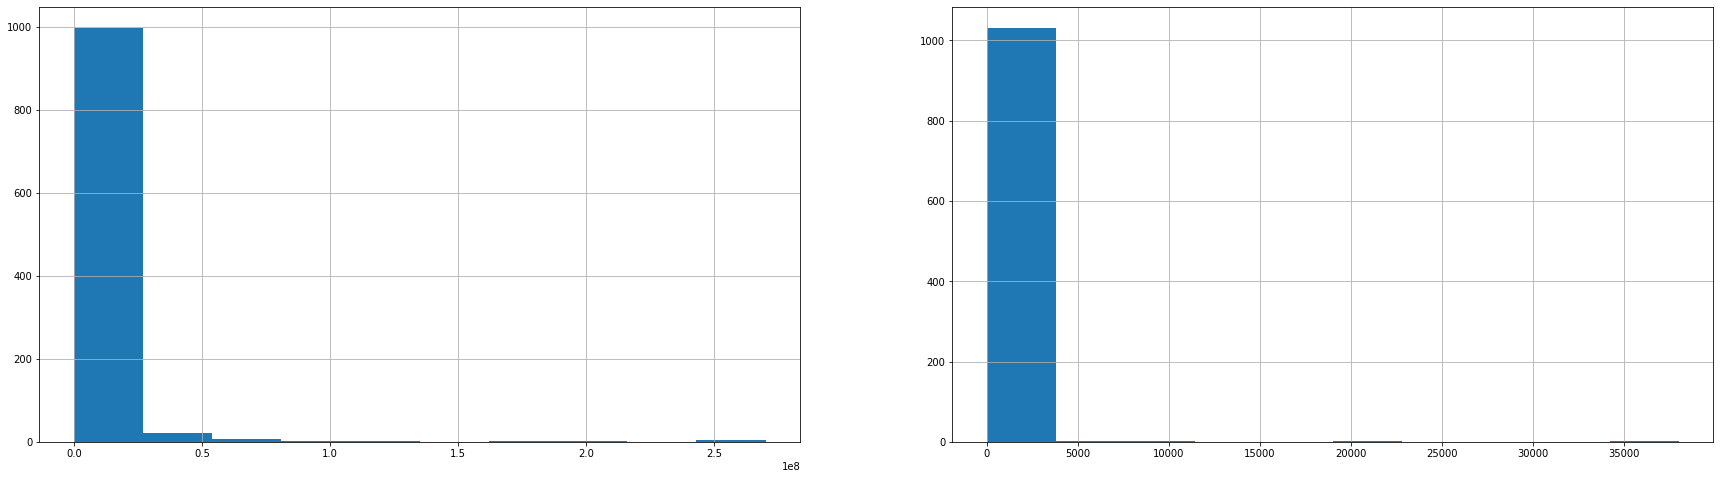

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
plt.subplot(1, 2, 1)
y_train.hist()
plt.subplot(1, 2, 2)
x_train.Area.hist()

<AxesSubplot:xlabel='Price'>

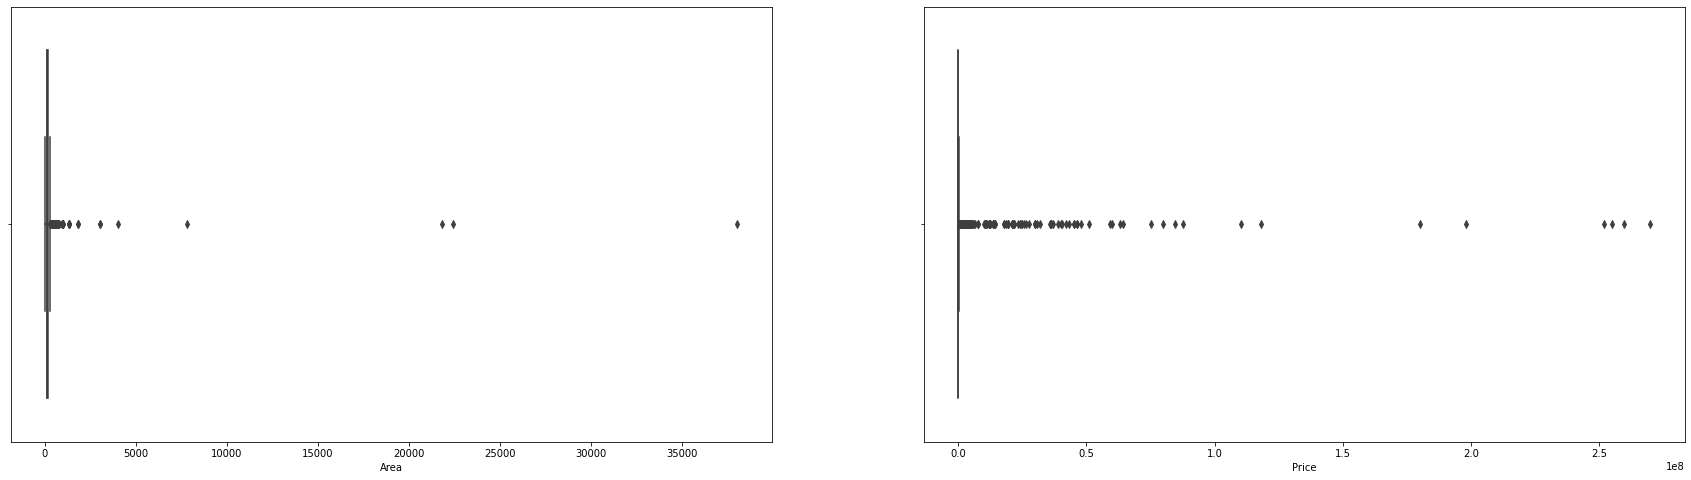

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x=x_train['Area'])
plt.subplot(1, 2, 2)
sns.boxplot(x=y_train)

<AxesSubplot:>

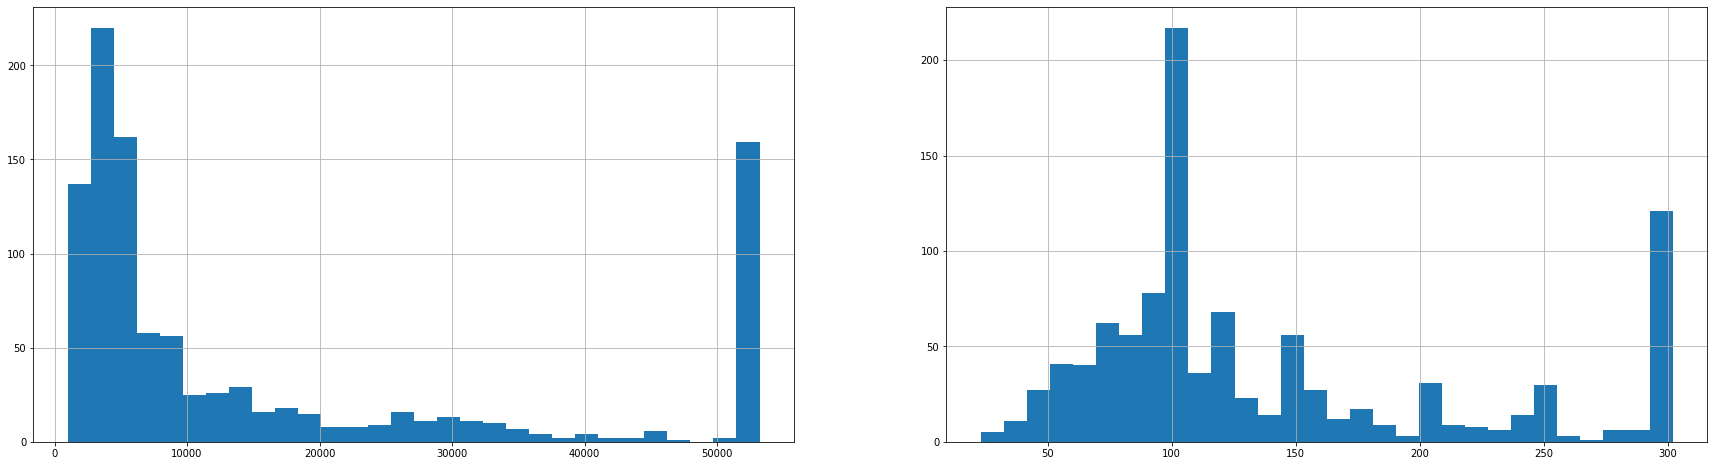

In [16]:
def skewed_outliers(sr: Series):
    IQR = sr.quantile(0.75) - sr.quantile(0.25)
    upper_bridge = sr.quantile(0.75) + (IQR * 1.5)
    sr.loc[sr >= int(upper_bridge)] = int(upper_bridge)
    return sr
y_train = skewed_outliers(y_train)
x_train['Area'] = skewed_outliers(x_train['Area'])
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
plt.subplot(1, 2, 1)
y_train.hist(bins=30)
plt.subplot(1, 2, 2)
x_train['Area'].hist(bins=30)


<AxesSubplot:xlabel='Area'>

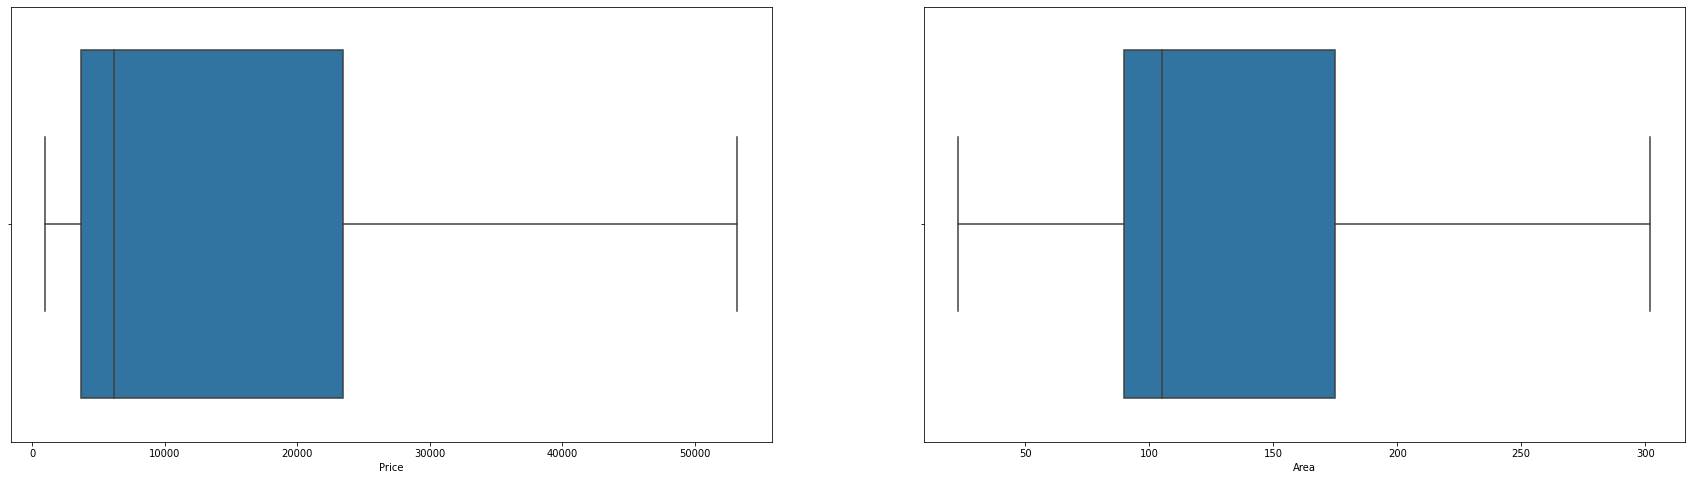

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x=y_train)
plt.subplot(1, 2, 2)
sns.boxplot(x=x_train['Area'])

### Chuẩn hoá Min-Max-Scaling train,test

# Data_cleaned

In [18]:
def MinMaxScaling(df: DataFrame,column:list):
    min_max=MinMaxScaler()
    df_minmax=pd.DataFrame(min_max.fit_transform(df[column]),columns = column)
    return df_minmax
data_scaler_first = MinMaxScaling(data_non_oulier,['Area','Price'])
data_scaler_first['district'] = data_non_oulier['district']
data_scaler_first['estate'] = data_non_oulier['estate']
data_scaler_first

,Area,Price,district,estate
0,0.005490,0.000103,4,0
1,0.006991,0.000129,4,0
2,0.005490,0.062033,4,0
3,0.002489,0.000052,2,6
4,0.006366,0.000088,4,0
...,...,...,...,...
1477,0.002489,0.000051,2,6
1478,0.001989,0.000009,0,7
1479,0.000738,0.008662,4,2
1480,0.003439,0.000010,6,7


### Train

In [19]:
x_train_new = x_train.copy()
x_train_new['Price'] = y_train
data_scaler_train = MinMaxScaling(x_train_new,['Area','Price'])
x_train_new.reset_index(inplace = True)
data_scaler_train['district'] = x_train_new['district']
data_scaler_train['estate'] = x_train_new['estate']
data_scaler_train

,Area,Price,district,estate
0,0.275986,0.092912,4,4
1,0.243728,1.000000,5,4
2,0.143369,0.044061,3,4
3,0.160573,0.072797,2,4
4,0.240143,0.066092,4,7
...,...,...,...,...
1032,0.813620,0.459770,4,0
1033,0.240143,0.054598,4,7
1034,0.275986,0.049234,0,7
1035,0.170251,0.019157,2,1


### Test

In [20]:
x_test_new = x_test.copy()
x_test_new['Price'] = y_test
data_scaler_test = MinMaxScaling(x_test_new,['Area','Price'])
x_test_new.reset_index(inplace = True)
data_scaler_test['district'] = x_test_new['district']
data_scaler_test['estate'] = x_test_new['estate']
data_scaler_test

,Area,Price,district,estate
0,0.154317,1.000000,0,7
1,0.001989,0.000008,0,5
2,0.008742,0.000039,4,0
3,0.002989,0.000012,4,7
4,0.001989,0.000011,4,7
...,...,...,...,...
440,0.002339,0.000051,5,7
441,0.004365,0.000061,2,5
442,0.001989,0.000006,1,5
443,0.001989,0.000003,4,7
